32/32 [==============================] - 0s 399us/step


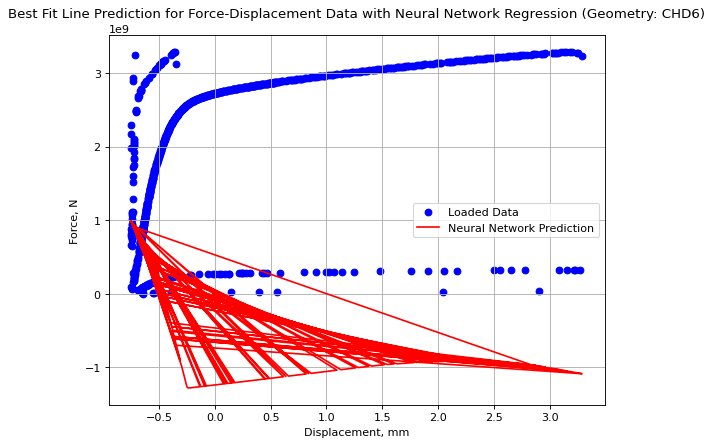

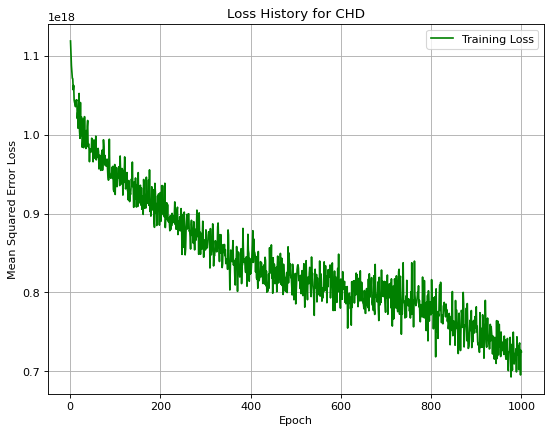

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Load the displacement and force data from the CSV files
disp_data = pd.read_csv("MODEL_DATA/disp_chd6.csv")
force_data = pd.read_csv("MODEL_DATA/force_chd6.csv")

# Extract the displacement and force columns from the data
displacement = disp_data["displacement/mm"].values
true_force = force_data["force/kN"].values

scaler = StandardScaler()
displacement = scaler.fit_transform(displacement.reshape(-1, 1))

# Define a more complex neural network for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Adding dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Adding dropout
    tf.keras.layers.Dense(1, activation='linear')
])

model.add(tf.keras.layers.Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(displacement, true_force, epochs=100, validation_split=0.2, verbose=0, callbacks=[loss_callback, early_stopping])

# Initialize an empty list to store the loss history
loss_history = []

# Define a callback to record the loss at the end of each epoch
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss_history.append(logs['loss'])

# Create an instance of the LossHistory callback
loss_callback = LossHistory()

# Train the model with the callback
model.fit(displacement, true_force, epochs=1000, verbose=0, callbacks=[loss_callback])

# Generate predictions using the trained model
predicted_force = model.predict(displacement)

# Plot the loaded data and the predicted curve
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Best Fit Line Prediction for Force-Displacement Data with Neural Network Regression (Geometry: CHD6)")
plt.xlabel("Displacement, mm")
plt.ylabel("Force, N")

plt.scatter(displacement, true_force, label="Loaded Data", color="blue")
plt.plot(displacement, predicted_force, label="Neural Network Prediction", color="red")

plt.legend()
plt.grid(True)
plt.show()

# Plot the loss history
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Loss History for CHD")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")

plt.plot(range(1, len(loss_history) + 1), loss_history, label="Training Loss", color="green")

plt.legend()
plt.grid(True)
plt.show()
